In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product
from dateutil.relativedelta import relativedelta

import scipy.stats as scs
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from scipy.optimize import minimize

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tqdm.notebook import tqdm
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые


from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV # подбор гиперпараметров с кроссвалидацией

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from xgboost import XGBRegressor
from sklearn.metrics import f1_score

import statsmodels


import gc
import glob
import os
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from numpy import percentile

# sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from tqdm import tqdm
from tensorflow.keras.models import load_model

from itertools import product

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/k8s/datasets/nabout.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df

,cpu_usage,net_usage,disk_usage,anomaly
timestamp,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True
2014-02-14 14:45:00,0.134,249894.0,0.0,False
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True
...,...,...,...,...
2014-03-13 14:04:00,0.066,219813.0,7878250.0,False
2014-03-13 14:09:00,0.068,207644.0,107195000.0,True
2014-03-13 14:14:00,0.134,204319.0,44328600.0,False


In [ ]:
for column in df.columns:
    fig = px.line(df, x=df.index, y=[column], title='AWS ' + column, template = 'plotly_dark')
    fig.show()

# Transformer

In [ ]:
df_sc = df.copy()
column_usage = 'cpu_usage'

scaler = StandardScaler()
scaler = scaler.fit(df_sc[[column_usage]])

df_sc[column_usage] = scaler.transform(df[[column_usage]])

In [ ]:
!pip install deepod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 869.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.0 which i

In [ ]:
from deepod.models.time_series import AnomalyTransformer

use_saved_model = False
model = load_model('/content/my_model(1).h5') if use_saved_model else AnomalyTransformer(epochs=30)
model.fit(df_sc[[column_usage]])

epoch  1, training loss: -24.332047, time: 2.0s
epoch  2, training loss: -34.505590, time: 2.0s
epoch  3, training loss: -42.683985, time: 2.0s
epoch  4, training loss: -44.663506, time: 2.0s
epoch  5, training loss: -45.251448, time: 2.0s
epoch  6, training loss: -45.494442, time: 2.0s
epoch  7, training loss: -45.534631, time: 2.0s
epoch  8, training loss: -45.687173, time: 2.0s
epoch  9, training loss: -45.801175, time: 2.0s
epoch 10, training loss: -46.039190, time: 2.0s
epoch 11, training loss: -46.050582, time: 2.0s
epoch 12, training loss: -46.212942, time: 2.0s
epoch 13, training loss: -46.371224, time: 2.0s
epoch 14, training loss: -46.484165, time: 2.0s
epoch 15, training loss: -46.575517, time: 2.0s
epoch 16, training loss: -46.669786, time: 2.0s
epoch 17, training loss: -46.725277, time: 2.1s
epoch 18, training loss: -46.728541, time: 2.1s
epoch 19, training loss: -46.776161, time: 2.1s
epoch 20, training loss: -46.811755, time: 2.1s
epoch 21, training loss: -46.847210, tim

In [ ]:
pred = model.predict(df_sc[[column_usage]])
dfx = df.copy()
dfx["outlier"] = pred
dfx

,cpu_usage,net_usage,disk_usage,anomaly,outlier
timestamp,,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False,0
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True,0
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True,0
2014-02-14 14:45:00,0.134,249894.0,0.0,False,0
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True,0
...,...,...,...,...,...
2014-03-13 14:04:00,0.066,219813.0,7878250.0,False,1
2014-03-13 14:09:00,0.068,207644.0,107195000.0,True,0
2014-03-13 14:14:00,0.134,204319.0,44328600.0,False,0


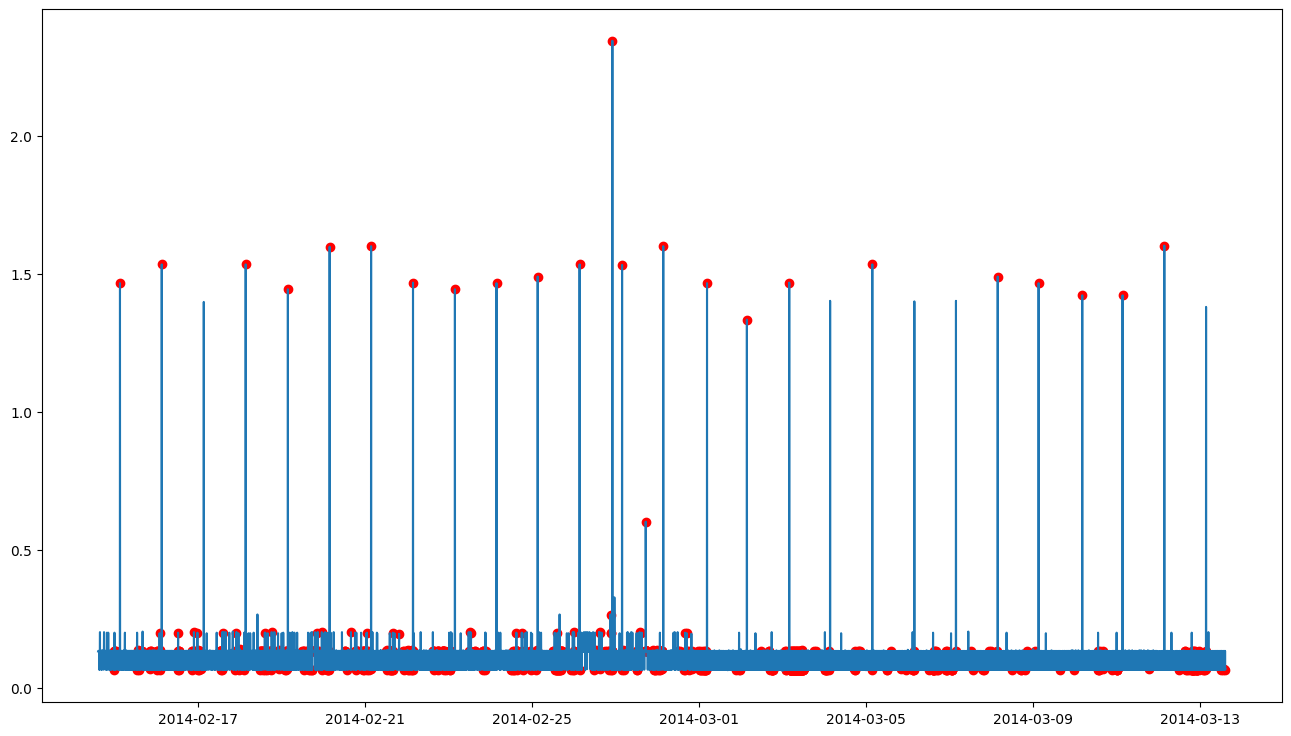

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

In [ ]:
y_pred = dfx['outlier']
colors = ['green' if a == 0 else 'red' for a in y_pred]

# Create a scatter plot of the data with anomalies highlighted in red
fig = go.Figure(data=go.Scatter(x=dfx.index, y=dfx[column_usage],
                                 mode='markers', marker=dict(color=colors, size=3)))

# Set the title and axis labels for the plot
fig.update_layout(title=dict(text='LOF Anomaly prediction', x=0.5),
                  yaxis_title='Value',
                  xaxis_title='Timestamp')

# Show the plot
fig.show()

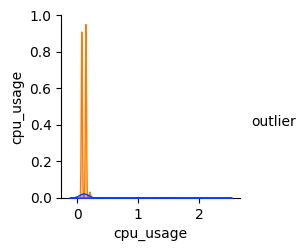

In [ ]:
sns.pairplot(data=dfx, vars = df[[column_usage]],
             hue='outlier', hue_order=[1, 0],
             markers=['*', 'o'],  palette='bright');

# Metrics


In [ ]:
y_pred = (y_pred == 0)
dfx['name'] = y_pred
y_pred

timestamp
2014-02-14 14:30:00     True
2014-02-14 14:35:00     True
2014-02-14 14:40:00     True
2014-02-14 14:45:00     True
2014-02-14 14:50:00     True
                       ...  
2014-03-13 14:04:00    False
2014-03-13 14:09:00     True
2014-03-13 14:14:00     True
2014-03-13 14:19:00     True
2014-03-13 14:24:00     True
Name: outlier, Length: 7775, dtype: bool

In [ ]:
print(dfx['name'].value_counts())

True     6997
False     778
Name: name, dtype: int64


In [ ]:
p_values = {}
p_stats_ = {}
percent = {}
silhoutte = {}
calinski_harabasz = {}
davies_bouldin = {}

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

cols_in = [column_usage]

In [ ]:
dfx['name'].value_counts()

True     6997
False     778
Name: name, dtype: int64

In [ ]:
#percent anomaly
dist = dfx['name'].value_counts(normalize=True)
print(dist)
percent['name'] = dist.loc[True]

True     0.899936
False    0.100064
Name: name, dtype: float64


In [ ]:
#silhouette conficient samples non-anomaly
labels = [1 if i == True else 2 for i in dfx['name']]
dfx['silhouette_zcore_'] = silhouette_samples(df[[column_usage]], labels)
print(silhouette_samples(df[[column_usage]], labels))
print(dfx[dfx['name']]['silhouette_zcore_'])
silhoutte['name'] = dfx[dfx['name']]['silhouette_zcore_'].mean()

[0.52839695 0.52357302 0.52357302 ... 0.52357302 0.55394142 0.55394142]
timestamp
2014-02-14 14:30:00    0.528397
2014-02-14 14:35:00    0.523573
2014-02-14 14:40:00    0.523573
2014-02-14 14:45:00    0.523573
2014-02-14 14:50:00    0.523573
                         ...   
2014-03-13 13:59:00    0.523573
2014-03-13 14:09:00    0.553941
2014-03-13 14:14:00    0.523573
2014-03-13 14:19:00    0.553941
2014-03-13 14:24:00    0.553941
Name: silhouette_zcore_, Length: 6997, dtype: float64


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(df[[column_usage]], labels)
calinski_harabasz['name'] = round(ch_index, 3)
print("Calinski-Harabasz Index:", round(ch_index, 3))

Calinski-Harabasz Index: 174.854


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[[column_usage]], labels)
davies_bouldin['name'] = round(dbi, 3)
print("Davies-Bouldin Index:", round(dbi, 3))

Davies-Bouldin Index: 2.682


In [ ]:
#ks coeficient
normal = dfx.loc[dfx['name'] == False, [column_usage]]
anomaly = dfx.loc[dfx['name'] == True, [column_usage]]
print(normal)
print(anomaly)
print(len(normal))
print(len(anomaly))
for col_in in tqdm(cols_in):
  if len(normal)>0 and len(anomaly)>0:
    stats_, pvalue = stats.kstest(normal[col_in], anomaly[col_in])
    p_values[col_in+'_'] = pvalue
    p_stats_[col_in+'_'] = stats_

                     cpu_usage
timestamp                     
2014-02-14 23:45:00      0.066
2014-02-14 23:50:00      0.134
2014-02-15 00:00:00      0.134
2014-02-15 00:05:00      0.134
2014-02-15 00:55:00      0.134
...                        ...
2014-03-13 12:09:00      0.066
2014-03-13 12:49:00      0.068
2014-03-13 12:54:00      0.066
2014-03-13 13:34:00      0.068
2014-03-13 14:04:00      0.066

[778 rows x 1 columns]
                     cpu_usage
timestamp                     
2014-02-14 14:30:00      0.132
2014-02-14 14:35:00      0.134
2014-02-14 14:40:00      0.134
2014-02-14 14:45:00      0.134
2014-02-14 14:50:00      0.134
...                        ...
2014-03-13 13:59:00      0.134
2014-03-13 14:09:00      0.068
2014-03-13 14:14:00      0.134
2014-03-13 14:19:00      0.068
2014-03-13 14:24:00      0.068

[6997 rows x 1 columns]
778
6997


100%|██████████| 1/1 [00:00<00:00, 164.87it/s]


pvalue
  svm_algorithm    pvalue
0    cpu_usage_  0.044244
{'cpu_usage_': 0.04424436623904002}


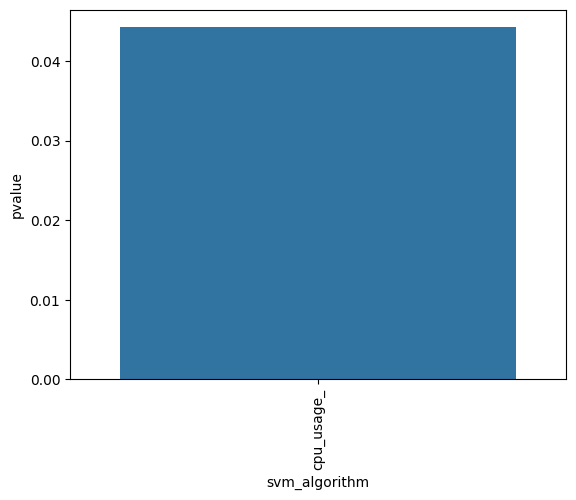

statistics
  svm_algorithm  statistics
0    cpu_usage_    0.051903
{'cpu_usage_': 0.051903074141580324}


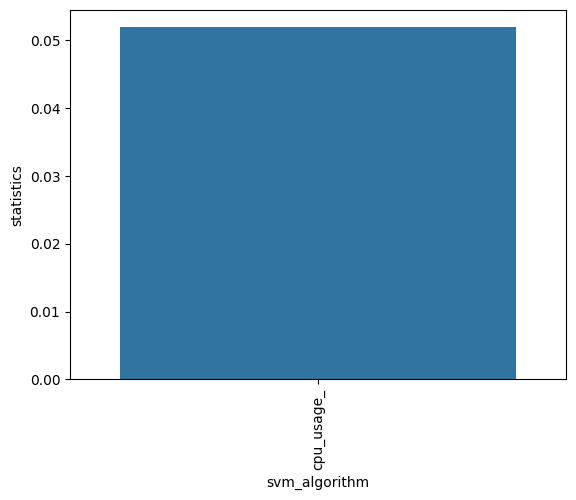

percent
  svm_algorithm   percent
0          name  0.899936
{'name': 0.899935691318328}


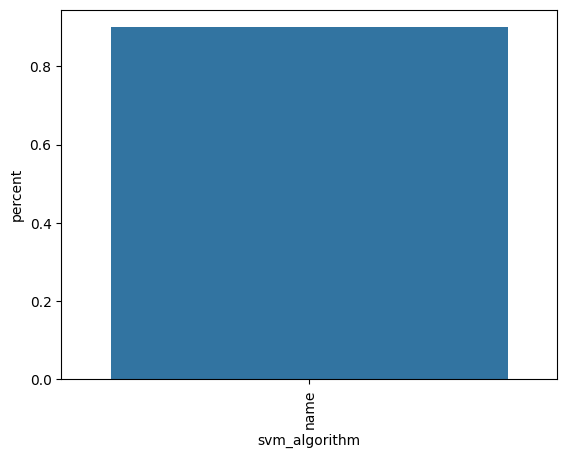

silhoutte
  svm_algorithm  silhoutte
0          name   0.531717
{'name': 0.531717232930327}


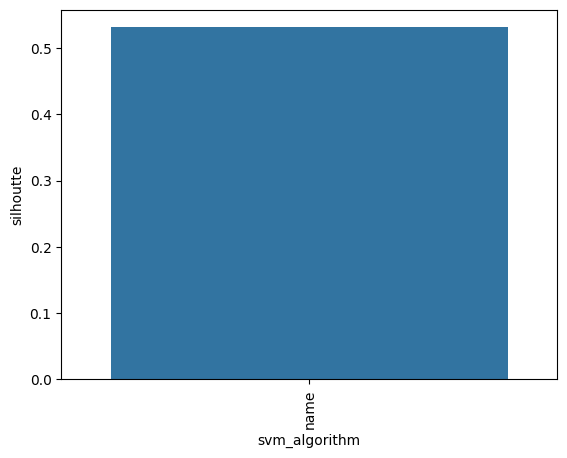

calinski_harabasz
  svm_algorithm  calinski_harabasz
0          name            174.854
{'name': 174.854}


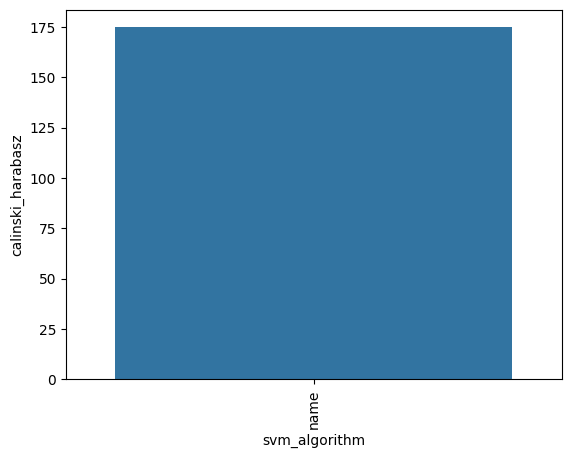

davies_bouldin
  svm_algorithm  davies_bouldin
0          name           2.682
{'name': 2.682}


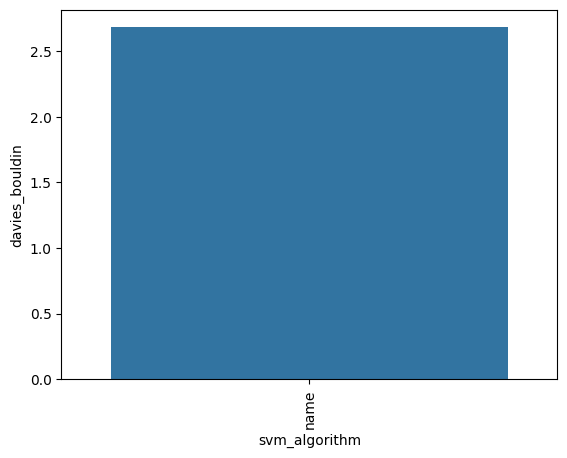

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name)
    df_values =  pd.DataFrame([dictionary])
    df_values = df_values.T
    df_values.reset_index(inplace=True)
    df_values.columns = ['svm_algorithm', name]
    print(df_values)
    print(dictionary)

    sns.barplot(data=df_values, x='svm_algorithm', y=name)
    plt.xticks(df_values.index, df_values['svm_algorithm'].values, rotation=90)
    plt.show()

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name + ': ' + str(np.array(list(dictionary.values())).mean()))

pvalue: 0.04424436623904002
statistics: 0.051903074141580324
percent: 0.899935691318328
silhoutte: 0.531717232930327
calinski_harabasz: 174.854
davies_bouldin: 2.682


In [ ]:
svm_df = pd.DataFrame()
svm_df['anomaly']  = [1 if i==True else 0 for i in df.anomaly]

svm_f1 = f1_score(dfx['outlier'], svm_df['anomaly'])
print(f'One Class SVM F1 Score : {round(svm_f1 * 100,2)}%')

One Class SVM F1 Score : 8.17%


# Save Model

In [ ]:
#  model.save('/content/drive/MyDrive/Colab Notebooks/k8s/models/model_transformer_collected.h5')


In [ ]:
import torch

torch.save(model, "/content/drive/MyDrive/Colab Notebooks/k8s/models/model_transformer_nab.pt")